###*Sayantan Mukherjee 60009220131 D2-2*

The UCB1 algorithm is a reinforcement learning strategy that balances exploration and exploitation dynamically as it gathers knowledge about the environment.

It follows the principle of *optimism in the face of uncertainty* , meaning it selects actions optimistically based on their current estimated rewards and uncertainty.

###Exploitation :
Represented by Q(a), the estimated value of action a at time step t.
Encourages selecting the action with the highest known reward.

###Exploration :
Controlled by the uncertainty term

###UCB(a)=Q(a)+c x math.sqrt(log(t)/N(a))

Where:
Q(a): Estimated value (average reward) of action a.

N(a): Number of times action a has been selected prior to time t.

c: Confidence value that controls the level of exploration.

t: Current time step.







Step 1:
UCB values: [0. 0. 0. 0. 0.]
Action selected: 0
Updated values for action 0: [1.08670206 0.         0.         0.         0.        ]

Step 2:
UCB values: [  2.26410619 372.32974111 372.32974111 372.32974111 372.32974111]
Action selected: 1
Updated values for action 1: [1.08670206 0.25738709 0.         0.         0.        ]

Step 3:
UCB values: [  2.56899845   1.73968349 468.74562156 468.74562156 468.74562156]
Action selected: 2
Updated values for action 2: [1.08670206 0.25738709 0.13253718 0.         0.        ]

Step 4:
UCB values: [  2.75180295   1.92248799   1.79763808 526.55376955 526.55376955]
Action selected: 3
Updated values for action 3: [1.08670206 0.25738709 0.13253718 0.04261975 0.        ]

Step 5:
UCB values: [  2.88081567   2.0515007    1.92665079   1.83673335 567.3513748 ]
Action selected: 4
Updated values for action 4: [1.08670206 0.25738709 0.13253718 0.04261975 0.65520878]

Step 6:
UCB values: [2.97971107 2.1503961  2.02554619 1.93562876 2.54821779]
Action 

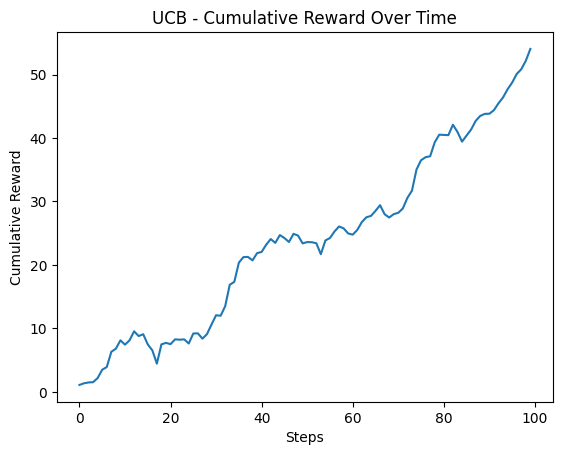

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class UCB:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.counts = np.zeros(n_actions)
        self.values = np.zeros(n_actions)
        self.total_counts = 0

    def select_action(self):
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts + 1) / (self.counts + 1e-5))
        print(f"UCB values: {ucb_values}")
        selected_action = np.argmax(ucb_values)
        print(f"Action selected: {selected_action}")
        return selected_action

    def update(self, action, reward):
        self.counts[action] += 1
        self.total_counts += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]
        print(f"Updated values for action {action}: {self.values}")

class BanditEnvironment:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.means = np.random.uniform(0, 1, n_actions)

    def get_reward(self, action):
        return np.random.normal(self.means[action], 1)

def run_ucb(n_actions, n_steps):
    env = BanditEnvironment(n_actions)
    ucb_agent = UCB(n_actions)

    rewards = np.zeros(n_steps)

    for t in range(n_steps):
        print(f"\nStep {t + 1}:")
        action = ucb_agent.select_action()
        reward = env.get_reward(action)
        ucb_agent.update(action, reward)
        rewards[t] = reward

    return rewards

n_actions = 5
n_steps = 100

rewards = run_ucb(n_actions, n_steps)

plt.plot(np.cumsum(rewards))
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('UCB - Cumulative Reward Over Time')
plt.show()


Thompson Sampling is another popular algorithm for solving the multi-armed bandit problem. Unlike UCB1, which uses an optimistic estimate of rewards, Thompson Sampling is a probabilistic approach based on Bayesian inference.

It maintains a probability distribution for the expected reward of each arm and samples from these distributions to decide which arm to pull.

For each arm, maintain a Beta distribution (commonly used for binary rewards) to represent the uncertainty about the true mean reward.

At each time step, sample a value from the Beta distribution of each arm and select the arm with the highest sampled value.

Update the Beta distribution of the selected arm based on the observed reward.

The probability density function (PDF) of the Beta distribution is given by:

P(x;α,β)=
(x^
α−1) x
 [(1−x)^
β−1]/B(α,β)

Where:

B(α,β): Normalizing constant, called the Beta function, defined as:

B(α,β)=∫
0-1
​
 (t ^ α−1) x
 [(1−t) ^
β−1]
 dt

For binary rewards (e.g., 0 or 1), the update rules are:

If the arm results in a success (reward = 1):
Increment α→α+1.
If the arm results in a failure (reward = 0):
Increment β→β+1.




Step 1:
Thompson Sampling samples: [0.70425891 0.80552589 0.60825896 0.1955433  0.72735839]
Action selected: 1
Updated alpha and beta for action 1: alpha=2.0, beta=1.0

Step 2:
Thompson Sampling samples: [0.98051879 0.77463185 0.76258541 0.99231012 0.26537867]
Action selected: 3
Updated alpha and beta for action 3: alpha=2.0, beta=1.0

Step 3:
Thompson Sampling samples: [0.43916922 0.76883099 0.54375202 0.93543745 0.96606589]
Action selected: 4
Updated alpha and beta for action 4: alpha=1.0, beta=2.0

Step 4:
Thompson Sampling samples: [0.8554905  0.31789213 0.65605318 0.5418713  0.2228377 ]
Action selected: 0
Updated alpha and beta for action 0: alpha=1.0, beta=2.0

Step 5:
Thompson Sampling samples: [0.48653107 0.58481132 0.32784939 0.14904895 0.67492211]
Action selected: 4
Updated alpha and beta for action 4: alpha=1.0, beta=3.0

Step 6:
Thompson Sampling samples: [0.03436364 0.56448546 0.03421828 0.99027741 0.27456254]
Action selected: 3
Updated alpha and beta for action 3: alpha=

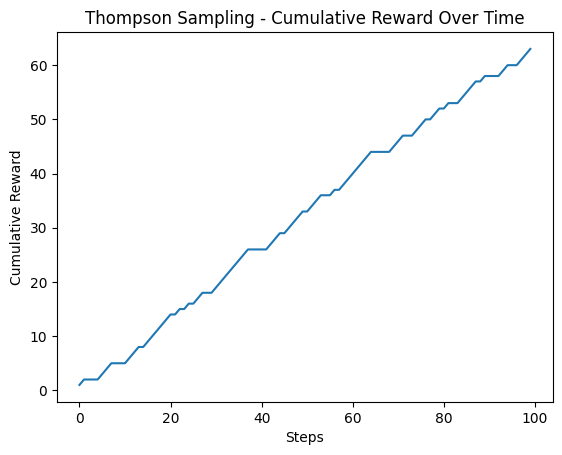

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class ThompsonSampling:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.alpha = np.ones(n_actions)
        self.beta = np.ones(n_actions)

    def select_action(self):
        samples = np.random.beta(self.alpha, self.beta)
        print(f"Thompson Sampling samples: {samples}")
        selected_action = np.argmax(samples)
        print(f"Action selected: {selected_action}")
        return selected_action

    def update(self, action, reward):
        if reward == 1:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1
        print(f"Updated alpha and beta for action {action}: alpha={self.alpha[action]}, beta={self.beta[action]}")

class BanditEnvironment:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.probabilities = np.random.uniform(0, 1, n_actions)  # True probabilities of success

    def get_reward(self, action):
        return np.random.binomial(1, self.probabilities[action])  # Bernoulli reward


def run_thompson_sampling(n_actions, n_steps):
    env = BanditEnvironment(n_actions)
    thompson_agent = ThompsonSampling(n_actions)

    rewards = np.zeros(n_steps)

    for t in range(n_steps):
        print(f"\nStep {t + 1}:")
        action = thompson_agent.select_action()
        reward = env.get_reward(action)
        thompson_agent.update(action, reward)
        rewards[t] = reward

    return rewards

n_actions = 5
n_steps = 100

rewards = run_thompson_sampling(n_actions, n_steps)

plt.plot(np.cumsum(rewards))
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Thompson Sampling - Cumulative Reward Over Time')
plt.show()


Streaming output truncated to the last 5000 lines.
Step 1:
UCB values: [0. 0. 0. 0. 0.]
Action selected: 0
Updated values for action 0: [0. 0. 0. 0. 0.]

Step 2:
UCB values: [  1.17740414 372.32974111 372.32974111 372.32974111 372.32974111]
Action selected: 1
Updated values for action 1: [0. 1. 0. 0. 0.]

Step 3:
UCB values: [  1.4822964    2.4822964  468.74562156 468.74562156 468.74562156]
Action selected: 2
Updated values for action 2: [0. 1. 0. 0. 0.]

Step 4:
UCB values: [  1.6651009    2.6651009    1.6651009  526.55376955 526.55376955]
Action selected: 3
Updated values for action 3: [0. 1. 0. 0. 0.]

Step 5:
UCB values: [  1.79411361   2.79411361   1.79411361   1.79411361 567.3513748 ]
Action selected: 4
Updated values for action 4: [0. 1. 0. 0. 0.]

Step 6:
UCB values: [1.89300901 2.89300901 1.89300901 1.89300901 1.89300901]
Action selected: 1
Updated values for action 1: [0. 1. 0. 0. 0.]

Step 7:
UCB values: [1.97275984 2.39495535 1.97275984 1.97275984 1.97275984]
Action selecte

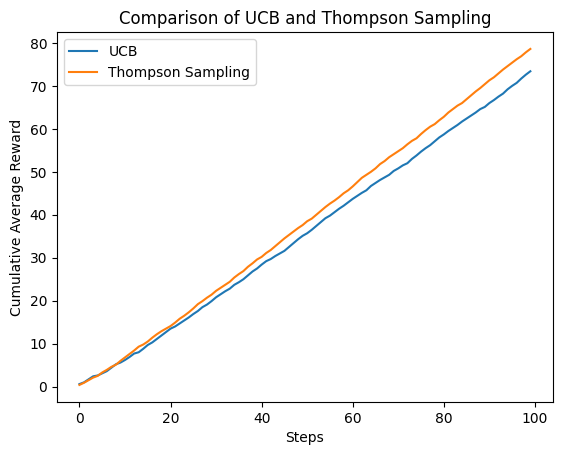

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def compare_algorithms(n_actions, n_steps, n_runs):
    ucb_rewards = np.zeros(n_steps)
    thompson_rewards = np.zeros(n_steps)

    for _ in range(n_runs):
        ucb_rewards += run_ucb(n_actions, n_steps)
        thompson_rewards += run_thompson_sampling(n_actions, n_steps)

    ucb_rewards /= n_runs
    thompson_rewards /= n_runs

    plt.plot(np.cumsum(ucb_rewards), label='UCB')
    plt.plot(np.cumsum(thompson_rewards), label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Average Reward')
    plt.title('Comparison of UCB and Thompson Sampling')
    plt.legend()
    plt.show()


n_actions = 5
n_steps = 100
n_runs = 10

compare_algorithms(n_actions, n_steps, n_runs)
